In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
import seaborn as sns
import pickle

In [2]:
#importing dataset
df = pd.read_csv('Ship.csv', parse_dates=['Date'], dayfirst=True)

In [3]:
#taking sample of dataset
df.sample(5)

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
1162,2023-11-05,Fish Carrier,NaN,Diesel,Fair,18.868795,1684.545433,944.812664,10.819349,Rough,1741.478346,434686.012335,452907.083496,42.307861,0.151512,1.065250,4,82.958869
439,2024-03-10,Tanker,Coastal,Heavy Fuel Oil (HFO),Good,22.457861,2874.928502,742.450794,6.859306,Calm,1260.188738,95896.737744,920054.972970,57.854357,0.558474,1.212552,8,73.042352
762,2023-10-29,Fish Carrier,Transoceanic,Diesel,Good,23.788427,727.675178,1042.659154,8.751349,Moderate,370.644524,148031.849561,590782.624260,62.050780,1.089983,1.195476,8,73.815756
426,2023-12-10,Bulk Carrier,Short-haul,Steam Turbine,Fair,17.571091,1798.860403,425.671394,12.563189,Calm,1832.304488,123257.288066,175370.019420,33.166230,1.438742,0.805714,9,97.269243
1872,2024-05-05,Container Ship,Coastal,Heavy Fuel Oil (HFO),Critical,15.559091,2613.036164,1978.665779,12.616381,Calm,1074.016719,186296.927395,855757.707231,34.948514,0.278549,1.112706,9,61.726928


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

# Data Preprocressing

In [5]:
#finding None or NaN values in the whole dataset
df.isna().sum()

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

The dataset had Blank values in Weather_Condition, Ship_Type, Route_Type,Engine_Type and Maintenence_Status columns

### Date Preprocessing

Date preprocessing includes changing date column format andextracting features like 'month','quarter' and 'year' for timeseries and analysis and finding any  'None' values.

In [6]:
# changing format of date column
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dt.normalize()
df['Date'].head()

0   2023-06-04
1   2023-06-11
2   2023-06-18
3   2023-06-25
4   2023-07-02
Name: Date, dtype: datetime64[ns]

In [7]:
#extracting month and quarter column from date
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year
df[['Month','Quarter','Year']].head()

,Month,Quarter,Year
0,6,2,2023
1,6,2,2023
2,6,2,2023
3,6,2,2023
4,7,3,2023


In [8]:
#counting values based on year
df['Year'].value_counts()

Year
2023    1488
2024    1248
Name: count, dtype: int64

In [9]:
#finding the range of dataset in terms of dates
min_date = df['Date'].min()
max_date = df['Date'].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2023-06-04 00:00:00
Maximum date: 2024-06-30 00:00:00


In [10]:
df['Date'].isna().sum()

0

### Data Cleaning

### For filling Categorical Columns, we went with mode imputation to not disturb the distribution of dataset.

In [11]:
categorical_features = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Weather_Condition','Maintenance_Status']
for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
#checking to find any 'None' values after mode imputation
df[['Weather_Condition','Ship_Type','Route_Type','Engine_Type','Maintenance_Status']].isna()

,Weather_Condition,Ship_Type,Route_Type,Engine_Type,Maintenance_Status
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2731,False,False,False,False,False
2732,False,False,False,False,False
2733,False,False,False,False,False
2734,False,False,False,False,False


In [13]:
df.isna().sum()

Date                       0
Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
Month                      0
Quarter                    0
Year                       0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.sample(5)

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,...,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Month,Quarter,Year
1287,2024-01-21,Fish Carrier,Coastal,Diesel,Good,19.318144,1313.621202,1668.917314,12.961828,Rough,...,179137.018332,307589.104017,18.422030,0.499041,1.418363,8,61.699278,1,1,2024
485,2023-12-24,Container Ship,Long-haul,Steam Turbine,Critical,19.151157,1801.314151,1120.762830,9.754092,Calm,...,413837.156652,947006.370145,15.835865,1.084089,1.099095,3,55.179697,12,4,2023
373,2024-01-07,Bulk Carrier,Coastal,Diesel,Good,10.517141,1297.576860,510.800497,12.882525,Calm,...,251675.036690,663243.693303,16.961244,1.292888,1.035392,6,90.388080,1,1,2024
1773,2023-07-16,Fish Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,15.039525,1036.264814,1727.077108,9.045639,Moderate,...,375087.952652,494608.452173,26.150567,1.143859,1.118006,2,67.962474,7,3,2023
2285,2023-07-09,Tanker,Transoceanic,Steam Turbine,Good,23.800506,1443.186607,887.076928,5.494054,Moderate,...,176463.898482,69020.359480,29.075540,0.583149,1.123061,3,73.888842,7,3,2023


### Data Encoding and Scaling

Considering there are many categories in Categorical Columns, encoding is needed. Also in Numerical columns, continous values needs to discretized  

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder only to categorical columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Ensures inte r encoding
    label_encoders[col] = le  # Store encoder for inverse transformation if needed
df.sample(5)

df.to_csv('Ship_Encoded.csv', index=False)

In [17]:
scaler = MinMaxScaler()
cols = df.select_dtypes(include=['number']).iloc[:,:-3]    
scaled_cols = cols.columns
cols = scaler.fit_transform(cols)
cols = pd.DataFrame(cols, columns=scaled_cols)
# Display summary statistics after standardization
cols.sample(5)

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
1520,0.000000,0.666667,1.0,0.0,0.057752,0.614946,0.425258,0.005436,0.5,0.080401,0.838622,0.973931,0.265178,0.978142,0.532510,1.00,0.580267
623,0.000000,1.000000,0.0,1.0,0.894386,0.784527,0.925540,0.257692,1.0,0.501868,0.992580,0.838049,0.309125,0.036717,0.579116,0.50,0.353631
563,0.333333,0.000000,0.0,0.0,0.813591,0.645565,0.534841,0.938189,0.5,0.449752,0.172197,0.753330,0.826284,0.531177,0.841907,0.00,0.330814
1782,0.333333,0.666667,0.5,0.5,0.322841,0.826414,0.176034,0.573637,0.5,0.200372,0.435055,0.290920,0.969510,0.598887,0.571775,1.00,0.857823
1691,0.000000,0.333333,0.0,0.5,0.110745,0.311056,0.501348,0.399166,0.0,0.927903,0.435553,0.878280,0.810929,0.872985,0.406691,0.25,0.599486


In [18]:
cols.describe()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,0.471491,0.485867,0.468385,0.527230,0.506637,0.503095,0.506171,0.493159,0.461075,0.504051,0.500469,0.496027,0.495853,0.499228,0.504205,0.489355,0.504269
std,0.380298,0.363648,0.413667,0.412431,0.287709,0.287064,0.291920,0.287901,0.408817,0.286674,0.287741,0.285617,0.294118,0.288475,0.288476,0.324706,0.290275
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.333333,0.000000,0.000000,0.261468,0.259069,0.255700,0.243773,0.000000,0.258482,0.247530,0.252742,0.236081,0.259734,0.258230,0.250000,0.253897
50%,0.333333,0.333333,0.500000,0.500000,0.514036,0.503049,0.506895,0.492145,0.500000,0.509508,0.504583,0.494779,0.493145,0.492953,0.509402,0.500000,0.509980
75%,0.666667,0.666667,1.000000,1.000000,0.752306,0.753318,0.765182,0.741788,1.000000,0.758117,0.759135,0.736886,0.756332,0.748519,0.753392,0.750000,0.754371
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ship_Type                2736 non-null   float64
 1   Route_Type               2736 non-null   float64
 2   Engine_Type              2736 non-null   float64
 3   Maintenance_Status       2736 non-null   float64
 4   Speed_Over_Ground_knots  2736 non-null   float64
 5   Engine_Power_kW          2736 non-null   float64
 6   Distance_Traveled_nm     2736 non-null   float64
 7   Draft_meters             2736 non-null   float64
 8   Weather_Condition        2736 non-null   float64
 9   Cargo_Weight_tons        2736 non-null   float64
 10  Operational_Cost_USD     2736 non-null   float64
 11  Revenue_per_Voyage_USD   2736 non-null   float64
 12  Turnaround_Time_hours    2736 non-null   float64
 13  Efficiency_nm_per_kWh    2736 non-null   float64
 14  Seasonal_Impact_Score   

In [20]:
cols.to_csv('Ship_Scaled.csv', index=False)

### Model Buidling

### Problem Statement: Predicting Revenue_Per_Voyage, Model Used: Multiple Linear Regression, Feature Selection  Lasso  

Revenue_per_Voyage_USD     949564.786887
Engine_Type                     0.350886
Weather_Condition               0.122034
Weekly_Voyage_Count             0.022993
Seasonal_Impact_Score          -0.000000
Cargo_Weight_tons               0.000000
Operational_Cost_USD            0.000000
Engine_Power_kW                -0.000000
Turnaround_Time_hours           0.000000
Average_Load_Percentage        -0.000000
Efficiency_nm_per_kWh          -0.000000
Speed_Over_Ground_knots        -0.069903
Draft_meters                   -0.076496
Maintenance_Status             -0.332700
Ship_Type                      -0.708225
Distance_Traveled_nm           -0.926025
Route_Type                     -1.967645
dtype: float64
R-squared: 1.0
Root Mean Squared Error: 4.1800750170515773e-10
Mean Squared Error: 1.7473027148178746e-19
Mean Absolute Error: 3.4501864296927524e-10


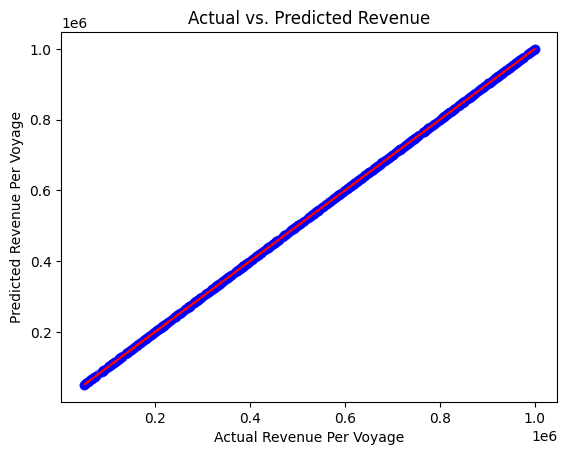

In [21]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
df["Log_Revenue"] = np.log1p(df["Revenue_per_Voyage_USD"])

# Standardize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(cols)  # Ensure cols is a DataFrame

# Fit Lasso regression for feature importance
lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, df['Revenue_per_Voyage_USD'])

# Save scaler and Lasso model
with open('scaler_lasso1.pkl', 'wb') as f:
    pickle.dump({'scaler': scaler, 'lasso': lasso}, f)

# Get and print feature importance
lasso_coefficients = pd.Series(lasso.coef_, index=cols.columns).sort_values(ascending=False)
print(lasso_coefficients)

# Define features and target (use the top features from Lasso)
selected_features = lasso_coefficients[lasso_coefficients != 0].index.tolist()
X = df[selected_features]
y = df['Revenue_per_Voyage_USD']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Scale using the same scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression() 
model.fit(X_train_scaled, y_train)

# Save linear regression model
with open('linear_regression1.pkl', 'wb') as f:
    pickle.dump({'scaler': scaler, 'model': model, 'features': selected_features}, f)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot(y_test, y_test, color="red", linestyle="--")  # Ideal prediction line
plt.xlabel("Actual Revenue Per Voyage")
plt.ylabel("Predicted Revenue Per Voyage")
plt.title("Actual vs. Predicted Revenue")
plt.show()



In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Define features and target using all features except the target variable
X_all = df.drop(columns=["Revenue_per_Voyage_USD"])
y_all = df["Revenue_per_Voyage_USD"]

# Split the dataset (80% train, 20% test)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_all, y_train_all)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_all)

# Evaluate the model
r2_rf = r2_score(y_test_all, y_pred_rf)
rmse_rf = mean_squared_error(y_test_all, y_pred_rf, squared=False)

print("Random Forest R² Score:", r2_rf)
print("Random Forest RMSE:", rmse_rf)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Float64DType'>)

### Problem Statement: Operational Cost Prediction with Elastic Net and PCA

Root Mean Squared Error: 0.29089992341483967
Mean Squared Error: 0.0846227654427596
Mean Absolute Error: 0.2539164787091581
R-squared: -0.00015408550326712067
Training complete. Model and PCA components saved.


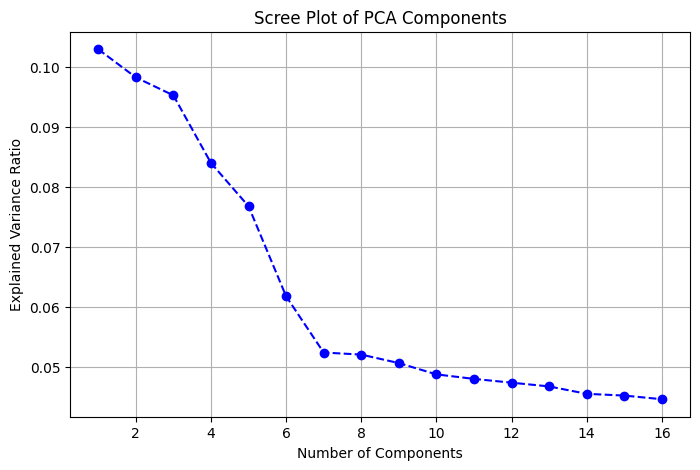

In [24]:
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# Define features and target (Assuming Min-Max Scaling is already applied)
X = cols.drop(columns=["Operational_Cost_USD"])  # Features
y = cols["Operational_Cost_USD"]  # Target variable

# Apply PCA (Retaining 95% variance)
pca = PCA(n_components=0.06)
X_pca = pca.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Elastic Net model with optimized hyperparameters
elastic_net_pca = ElasticNet(alpha=0.01, l1_ratio=0.7, random_state=42)
elastic_net_pca.fit(X_train, y_train)

# Make predictions
y_pred = elastic_net_pca.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rsme = np.sqrt(mse)

# Print results
print(f"Root Mean Squared Error: {rsme}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# After training PCA model
with open("training_columns5.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)  # Where X is your original training dataframe
# Save the model, scaler, and PCA components
pickle.dump(elastic_net_pca, open("model5.pkl", "wb"))
pickle.dump(pca, open("pca5.pkl", "wb"))

print("Training complete. Model and PCA components saved.")

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA and fit to data
pca = PCA()
X_pca = pca.fit_transform(X)  # Assuming 'X' is already defined

# Plot explained variance for each component
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of PCA Components')
plt.grid()
plt.show()


### Problem Statement: Predicting Turnaround Time with Ridge Regression with Forward Selection

Mean Squared Error: 0.09332441989741662
Mean Absolute Error: 0.2703718873218243
R-squared: 0.0033711464825531
Root Mean Squared Error: 0.30549045794822566
Selected Features: Index(['Ship_Type', 'Route_Type', 'Engine_Type', 'Engine_Power_kW',
       'Distance_Traveled_nm', 'Draft_meters', 'Weather_Condition',
       'Cargo_Weight_tons', 'Revenue_per_Voyage_USD',
       'Average_Load_Percentage'],
      dtype='object')
Training complete. Model, scaler and training columns saved.


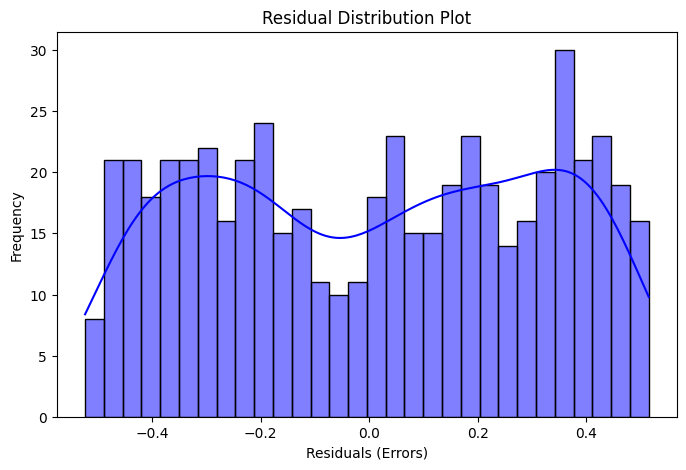

In [16]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# Define features and target
X = cols.drop(columns=["Turnaround_Time_hours"])  # Features
y = cols["Turnaround_Time_hours"]  # Target variable

# Ensure training_columns is derived properly without referencing a non-defined X_train
training_columns = X.columns

# Forward Feature Selection using Ridge Regression
ridge = Ridge(alpha=1.0)
selector = SequentialFeatureSelector(ridge, n_features_to_select=10, direction='forward')
selector.fit(X, y)
X_selected = selector.transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Ridge Regression Model
ridge.fit(X_train, y_train)

# Predictions
y_pred = ridge.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rsme = np.sqrt(mse)

# Print Results
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}") 
print(f"Root Mean Squared Error: {rsme}")
# Extract selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Save the model, scaler, and training columns
with open("model6.pkl", "wb") as model_file:
    pickle.dump(ridge, model_file)
with open("scaler6.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)
with open("training_columns6.pkl", "wb") as columns_file:
    pickle.dump(training_columns.tolist(), columns_file)

print("Training complete. Model, scaler and training columns saved.")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color="blue", edgecolor="black")

# Labels and title
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Residual Distribution Plot")

# Show plot
plt.show()


### Fuel Effiency Prediction(Efficiency nm per kWh) with Linear Regression and Variance Treshold

In [14]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define target variable
y = cols["Efficiency_nm_per_kWh"]  # Update based on your dataset
X = cols.drop(columns=["Efficiency_nm_per_kWh"])  # Drop target variable from features

# Apply Variance Threshold for feature selection
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
X_selected = selector.fit_transform(X)
selected_feature_names = X.columns[selector.get_support()]  # Extract selected features using original DataFrame

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rsme = np.sqrt(mse)

# Print results
print(f"Root Mean Squared Error: {rsme}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print("Selected Features:", selected_feature_names)

# Get feature importance (absolute coefficient values)
feature_importance = np.abs(model.coef_)

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot Feature Importance
# plt.figure(figsize=(8, 5))
# plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center", color="blue", alpha=0.7)
# plt.xticks(range(len(feature_importance)), np.array(selected_feature_names)[sorted_idx], rotation=90)
# plt.xlabel("Features")
# plt.ylabel("Importance (Coefficient Magnitude)")
# plt.title("Feature Importance - Linear Regression")
# plt.show()

Root Mean Squared Error: 0.2834590780365969
Mean Squared Error: 0.08034904892135754
Mean Absolute Error: 0.2428068371416105
R-squared: -0.004927743298565712
Selected Features: Index(['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status',
       'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons',
       'Operational_Cost_USD', 'Revenue_per_Voyage_USD',
       'Turnaround_Time_hours', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ship_Type                2736 non-null   int64  
 1   Route_Type               2736 non-null   int64  
 2   Engine_Type              2736 non-null   int64  
 3   Maintenance_Status       2736 non-null   int64  
 4   Speed_Over_Ground_knots  2736 non-null   float64
 5   Engine_Power_kW          2736 non-null   float64
 6   Distance_Traveled_nm     2736 non-null   float64
 7   Draft_meters             2736 non-null   float64
 8   Weather_Condition        2736 non-null   int64  
 9   Cargo_Weight_tons        2736 non-null   float64
 10  Operational_Cost_USD     2736 non-null   float64
 11  Revenue_per_Voyage_USD   2736 non-null   float64
 12  Turnaround_Time_hours    2736 non-null   float64
 13  Efficiency_nm_per_kWh    2736 non-null   float64
 14  Seasonal_Impact_Score   

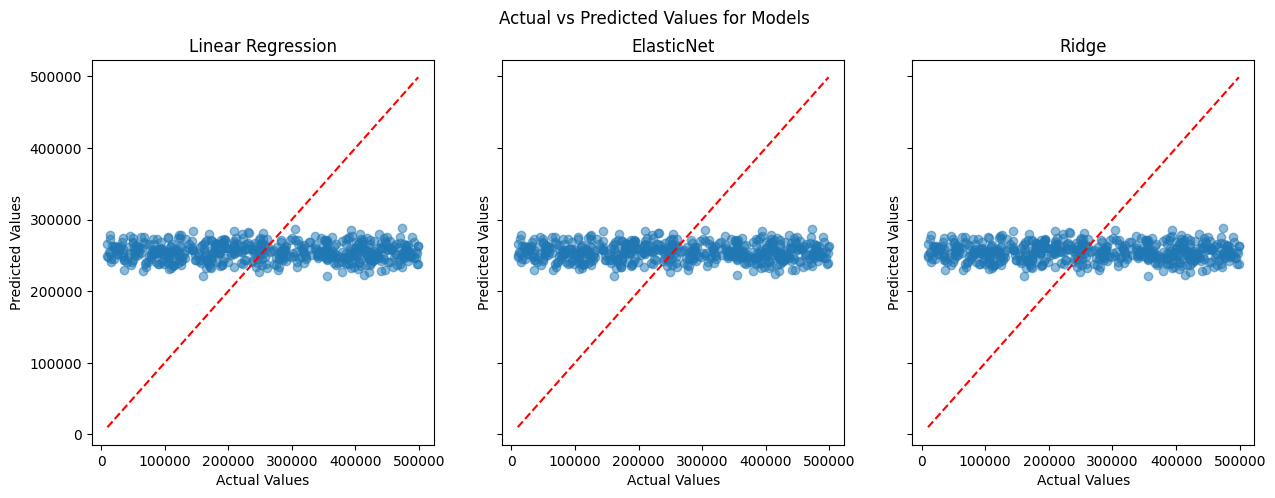

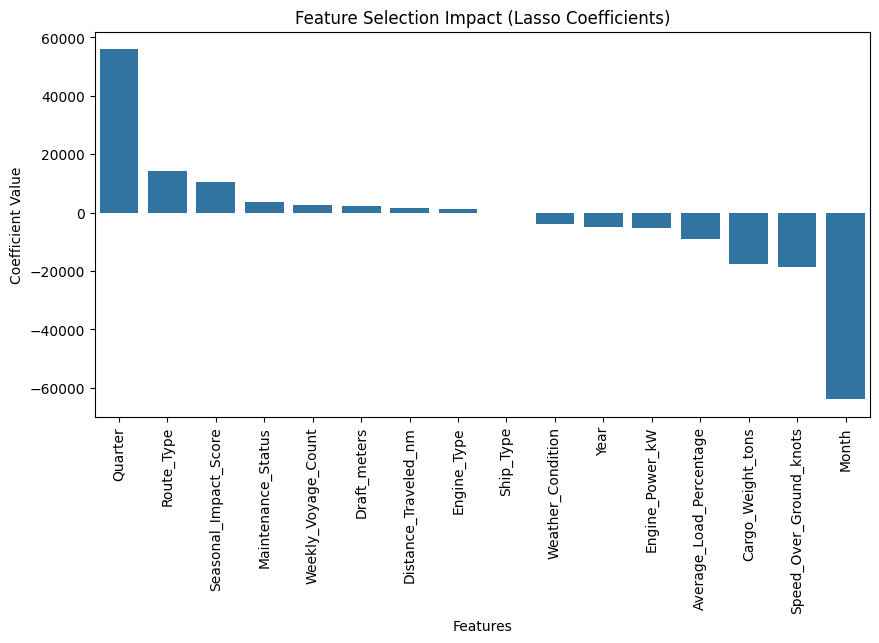

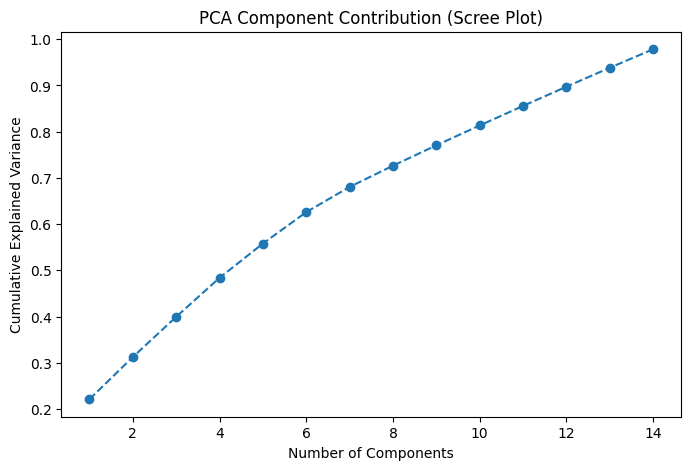

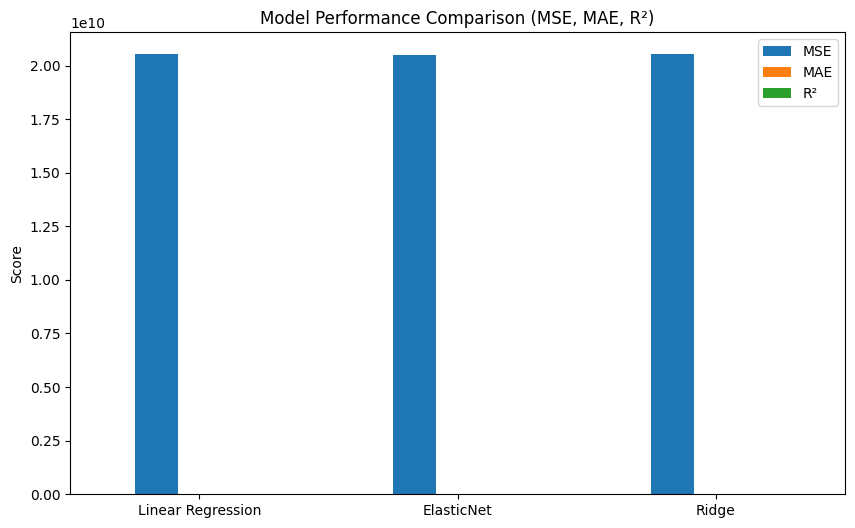

In [26]:
# Identify columns with datetime data
datetime_columns = df.select_dtypes(include=['datetime64']).columns

# Drop datetime columns if any
if len(datetime_columns) > 0:
    df = df.drop(columns=datetime_columns)

# Re-check dataset after dropping datetime columns
df.info(), df.head()

# Extract features and targets from the dataset
X = df.drop(columns=["Operational_Cost_USD", "Revenue_per_Voyage_USD", "Turnaround_Time_hours", "Efficiency_nm_per_kWh"])
y_operational_cost = df["Operational_Cost_USD"]
y_revenue = df["Revenue_per_Voyage_USD"]
y_turnaround = df["Turnaround_Time_hours"]
y_efficiency = df["Efficiency_nm_per_kWh"]

# Standardizing the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# PCA for Operational Cost Prediction
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_operational_cost, test_size=0.2, random_state=42)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.7, random_state=42),
    "Ridge": Ridge(alpha=1.0)
}

predictions = {}
performance_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    predictions[name] = (y_test, y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    performance_metrics[name] = {"MSE": mse, "MAE": mae, "R²": r2}

# Convert performance metrics to DataFrame
performance_df = pd.DataFrame(performance_metrics).T

# Plot 1: Actual vs. Predicted (Multi-Panel Scatter Plot)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, (name, (y_true, y_pred)) in enumerate(predictions.items()):
    axes[i].scatter(y_true, y_pred, alpha=0.5)
    axes[i].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], linestyle='--', color='red')
    axes[i].set_title(name)
    axes[i].set_xlabel("Actual Values")
    axes[i].set_ylabel("Predicted Values")

plt.suptitle("Actual vs Predicted Values for Models")
plt.show()

# Plot 2: Feature Selection Impact (Lasso Regression)
lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y_operational_cost)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=lasso_coefficients.index, y=lasso_coefficients.values)
plt.xticks(rotation=90)
plt.title("Feature Selection Impact (Lasso Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

# Plot 3: PCA Scree Plot (Operational Cost)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title("PCA Component Contribution (Scree Plot)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

# Plot 4: Model Performance Comparison
performance_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison (MSE, MAE, R²)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


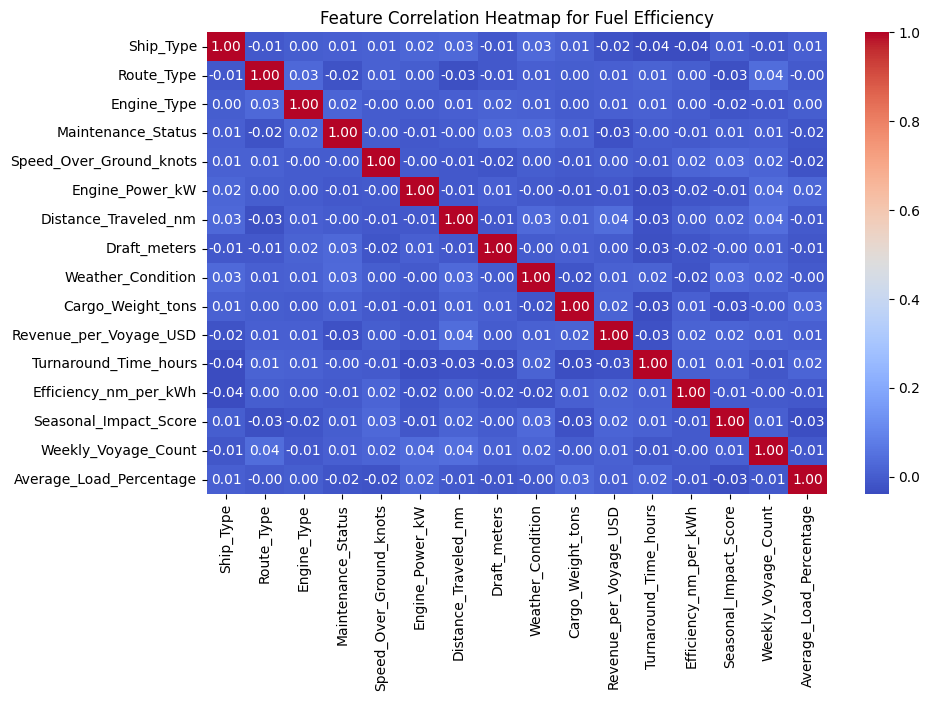

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correcting the error in the correlation method
# Compute correlation matrix
corr = cols[['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Speed_Over_Ground_knots', 'Engine_Power_kW',
            'Distance_Traveled_nm', 'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons', 'Revenue_per_Voyage_USD',
            'Turnaround_Time_hours', 'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count', 'Average_Load_Percentage']].corr()

# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap for Fuel Efficiency")
plt.show()

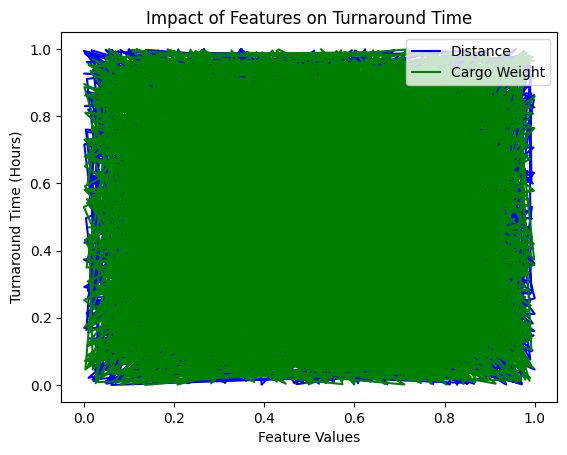

In [28]:
plt.plot(cols["Distance_Traveled_nm"], cols["Turnaround_Time_hours"], label="Distance", color='blue')
plt.plot(cols["Cargo_Weight_tons"], cols["Turnaround_Time_hours"], label="Cargo Weight", color='green')
plt.xlabel("Feature Values")
plt.ylabel("Turnaround Time (Hours)")
plt.title("Impact of Features on Turnaround Time")
plt.legend()
plt.show()


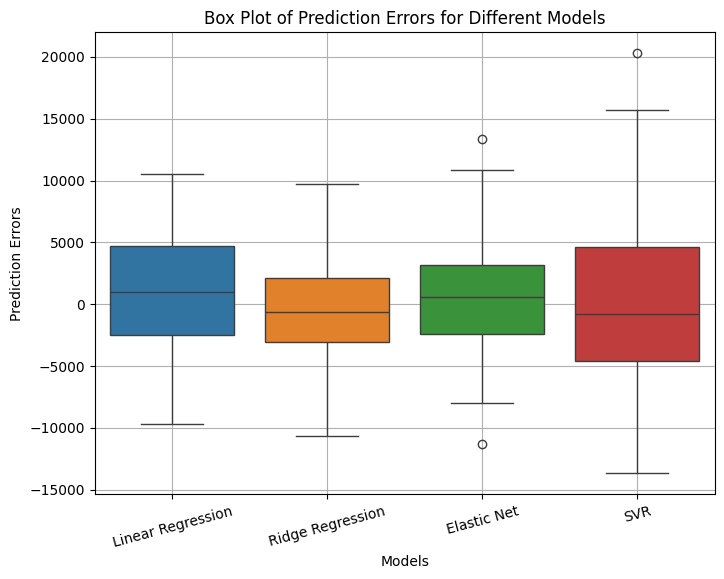

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example error data from different models (replace with your actual errors)
errors = {
    "Linear Regression": np.random.normal(loc=0, scale=5000, size=100),
    "Ridge Regression": np.random.normal(loc=0, scale=4000, size=100),
    "Elastic Net": np.random.normal(loc=0, scale=4500, size=100),
    "SVR": np.random.normal(loc=0, scale=6000, size=100),
}

# Convert errors to a DataFrame
import pandas as pd
df_errors = pd.DataFrame(errors)

# Plot the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_errors)
plt.ylabel("Prediction Errors")
plt.xlabel("Models")
plt.title("Box Plot of Prediction Errors for Different Models")
plt.xticks(rotation=15)
plt.grid(True)

# Show the plot
plt.show()
